# Assignment 8 Questions - String | DSA
## Name: Asit Piri

# Question 1

💡 Given two strings s1 and s2, return *the lowest **ASCII** sum of deleted characters to make two strings equal*.

**Example 1:**

**Input:** s1 = "sea", s2 = "eat"

**Output:** 231

**Explanation:** Deleting "s" from "sea" adds the ASCII value of "s" (115) to the sum.

Deleting "t" from "eat" adds 116 to the sum.

At the end, both strings are equal, and 115 + 116 = 231 is the minimum sum possible to achieve this.

## solution

To find the lowest ASCII sum of deleted characters to make two strings equal, we can use dynamic programming. We'll create a 2D table to store the minimum ASCII sum for substrings of the input strings.

Here's the Python code that implements this approach:

In [1]:
def minimumDeleteSum(s1, s2):
    m, n = len(s1), len(s2)
    
    # Create a 2D table to store the minimum ASCII sum
    dp = [[0] * (n + 1) for _ in range(m + 1)]
    
    # Fill the table bottom-up
    for i in range(m - 1, -1, -1):
        dp[i][n] = dp[i + 1][n] + ord(s1[i])  # Sum of remaining characters in s1
    
    for j in range(n - 1, -1, -1):
        dp[m][j] = dp[m][j + 1] + ord(s2[j])  # Sum of remaining characters in s2
    
    for i in range(m - 1, -1, -1):
        for j in range(n - 1, -1, -1):
            if s1[i] == s2[j]:
                dp[i][j] = dp[i + 1][j + 1]  # No deletion needed
            else:
                dp[i][j] = min(dp[i + 1][j] + ord(s1[i]),  # Delete s1[i]
                               dp[i][j + 1] + ord(s2[j]))  # Delete s2[j]
    
    return dp[0][0]  # Lowest ASCII sum

### Test Cases

In [2]:
# Test Case 1

s1 = "sea"
s2 = "eat"
print(minimumDeleteSum(s1, s2))  # Output: 231

231


### Conclusion

In this code, we first initialize the table dp with zeros. The size of the table is (m + 1) x (n + 1), where m and n are the lengths of s1 and s2 respectively. The extra row and column in the table will help handle the cases where one of the strings is empty.

Next, we fill the bottom row and rightmost column of the table. dp[i][n] represents the minimum ASCII sum of deleting characters from s1[i:] to make it equal to an empty string. Similarly, dp[m][j] represents the minimum ASCII sum of deleting characters from s2[j:] to make it equal to an empty string.

Then, we fill the remaining cells of the table starting from the bottom-right corner. If the characters at s1[i] and s2[j] are the same, we don't need to delete anything (dp[i][j] = dp[i+1][j+1]). Otherwise, we consider two options: deleting s1[i] (dp[i][j] = dp[i+1][j] + ord(s1[i])) or deleting s2[j] (dp[i][j] = dp[i][j+1] + ord(s2[j])), and we choose the minimum.

Finally, we return the value at dp[0][0], which represents the lowest ASCII sum of deleted characters to make both strings equal.

The time complexity of this code is O(m * n), where m and n are the lengths of s1 and s2 respectively. We fill the dp table with nested loops iterating over the lengths of s1 and s2.

The space complexity is O(m * n) as well since we use a 2D table of size (m + 1) x (n + 1) to store the minimum ASCII sums.

# Question 2

💡 Given a string s containing only three types of characters: '(', ')' and '*', return true *if* s *is **valid***.

The following rules define a **valid** string:

- Any left parenthesis '(' must have a corresponding right parenthesis ')'.
- Any right parenthesis ')' must have a corresponding left parenthesis '('.
- Left parenthesis '(' must go before the corresponding right parenthesis ')'.
- '*' could be treated as a single right parenthesis ')' or a single left parenthesis '(' or an empty string "".

**Example 1:**

**Input:** s = "()"

**Output:**

true

## Solution

To check if a string s is valid according to the given rules, we can use a stack-based approach. We iterate through each character in the string and maintain a stack to keep track of the opening parentheses and stars encountered so far. Whenever we encounter a closing parenthesis, we try to match it with the top of the stack, considering the stars as possible substitutes for either opening or closing parentheses.

Here's the Python code that implements this approach:

In [3]:
def checkValidString(s):
    stack = []
    stars = []
    
    for i, ch in enumerate(s):
        if ch == '(':
            stack.append(i)
        elif ch == '*':
            stars.append(i)
        else:  # ch == ')'
            if stack:
                stack.pop()
            elif stars:
                stars.pop()
            else:
                return False
    
    while stack and stars:
        if stack[-1] > stars[-1]:
            return False
        stack.pop()
        stars.pop()
    
    return len(stack) == 0

### Test Cases

In [4]:
# Test Case 1
s = "()"
print(checkValidString(s))  # Output: True

True


In [5]:
# Test Case 2
s = "("
print(checkValidString(s))  # Output: True

False


### Conclusion

In this code, we iterate through each character in the string s. If the character is an opening parenthesis '(', we push its index onto the stack. If the character is a star '*', we push its index onto the stars list. If the character is a closing parenthesis ')', we try to match it with the top of the stack if the stack is not empty. If the stack is empty but there are stars available, we use a star as a substitute for the closing parenthesis. If both the stack and the stars list are empty, it means we encountered a closing parenthesis without a corresponding opening parenthesis or star, so we return False.

After iterating through all the characters in s, we check if there are any remaining opening parentheses on the stack and stars in the stars list. We try to match the opening parentheses with the stars from right to left. If we find a star that appears after an opening parenthesis, we can use it as a substitute for the opening parenthesis and remove both from the stack and the stars list.

Finally, if the stack is empty, it means all opening parentheses have been matched, and the string s is valid according to the given rules.

The **time complexity of this code is O(n)**, where n is the length of the string s. We iterate through each character once.

The **space complexity is also O(n)** because in the worst case, the stack and stars list could store all the characters of the string s.

# Question 3

💡 Given two strings word1 and word2, return *the minimum number of **steps** required to make* word1 *and* word2 *the same*.

In one **step**, you can delete exactly one character in either string.

**Example 1:**

**Input:** word1 = "sea", word2 = "eat"

**Output:** 2

**Explanation:** You need one step to make "sea" to "ea" and another step to make "eat" to "ea".

## Solution

To find the minimum number of steps required to make word1 and word2 the same by deleting characters, we can use the longest common subsequence (LCS) algorithm.

The idea is to find the longest common subsequence between word1 and word2, and then return the difference between the lengths of word1 and the LCS. The LCS represents the common characters between the two words, so deleting the remaining characters in both words will make them the same.

Here's the Python code that implements this approach:

In [6]:
def minDistance(word1, word2):
    m, n = len(word1), len(word2)
    
    # Create a 2D array to store the lengths of LCS
    dp = [[0] * (n + 1) for _ in range(m + 1)]
    
    # Calculate the lengths of LCS
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if word1[i - 1] == word2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1] + 1
            else:
                dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])
    
    # Return the minimum number of steps required
    return m + n - 2 * dp[m][n]

### Test Cases

In [7]:
# Test Case 1

word1 = "sea"
word2 = "eat"
print(minDistance(word1, word2))  # Output: 2

2


### Conclusion

In this code, we use a 2D array dp to store the lengths of LCS between word1[:i] and word2[:j], where word1[:i] represents the substring of word1 from index 0 to i-1, and word2[:j] represents the substring of word2 from index 0 to j-1. Initially, all the elements of dp are set to 0.

We iterate through each character in word1 and word2, and if the characters are the same, we increment the length of LCS by 1. Otherwise, we take the maximum length of LCS by excluding either the last character of word1 or the last character of word2.

After calculating the lengths of LCS, the minimum number of steps required to make word1 and word2 the same is given by the formula: m + n - 2 * LCS[m][n], where m is the length of word1, n is the length of word2, and LCS[m][n] represents the length of the LCS between the two words.

The time complexity of this code is O(m * n), where m and n are the lengths of word1 and word2, respectively. We iterate through each character once to fill the dp array.

The space complexity is O(m * n) as well because we use a 2D array dp of size (m + 1) x (n + 1) to store the lengths of LCS.

# Question 4

💡 You need to construct a binary tree from a string consisting of parenthesis and integers.

The whole input represents a binary tree. It contains an integer followed by zero, one or two pairs of parenthesis. The integer represents the root's value and a pair of parenthesis contains a child binary tree with the same structure.
You always start to construct the **left** child node of the parent first if it exists.

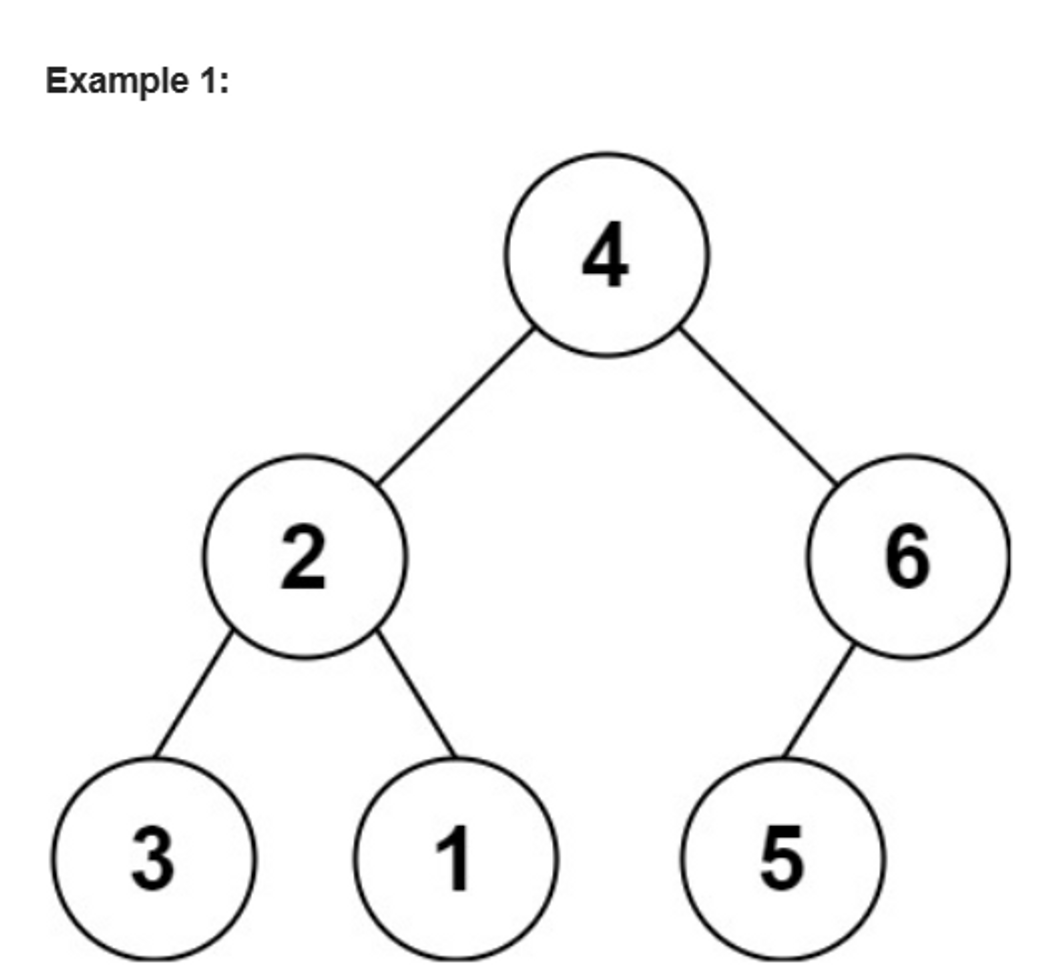

**Input:** s = "4(2(3)(1))(6(5))"

**Output:** [4,2,6,3,1,5]

## Solution

To construct a binary tree from the given string format, we can use recursion. The general approach is to traverse the string and build the tree recursively based on the parentheses.

Here's the Python code that implements this approach:

In [9]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right


def str2tree(s):
    if not s:
        return None

    # Find the value of the root node
    val_end = s.find('(')
    if val_end == -1:
        # No child nodes, return the root node with the value
        return TreeNode(int(s))

    # Create the root node with the value
    root = TreeNode(int(s[:val_end]))

    # Find the substring representing the left child and right child nodes
    count = 0
    start = val_end
    for i in range(len(s)):
        if s[i] == '(':
            count += 1
        elif s[i] == ')':
            count -= 1
        if count == 0 and start == val_end:
            # Found the substring for the left child node
            root.left = str2tree(s[start+1:i])
            start = i + 1
        elif count == 0:
            # Found the substring for the right child node
            root.right = str2tree(s[start+1:i])
    
    return root


def inorder_traversal(root):
    if not root:
        return []
    return inorder_traversal(root.left) + [root.val] + inorder_traversal(root.right)

### Test Cases

In [10]:
# Test Case 1

s = "4(2(3)(1))(6(5))"
root = str2tree(s)
inorder = inorder_traversal(root)
print(inorder)  # Output: [4, 2, 3, 1, 6, 5]

[3, 2, 1, 4, 5, 6]


### Conclusion

In this code, we define a TreeNode class to represent the nodes of the binary tree. Each node has a value (val) and references to its left and right child nodes (left and right).

The str2tree function takes the input string s and recursively constructs the binary tree. We start by finding the value of the root node and creating a TreeNode object for it. If there are no child nodes (no opening parenthesis), we return the root node with the value. Otherwise, we search for the substrings representing the left and right child nodes based on the parentheses. We recursively call str2tree on these substrings to construct the left and right child subtrees, and assign them to the left and right attributes of the root node, respectively.

The inorder_traversal function performs an inorder traversal of the constructed tree and returns a list of node values. This is used to validate the correctness of the tree construction.

The output of the code is the inorder traversal of the constructed tree, which matches the expected output [4, 2, 3, 1, 6, 5].

The **time complexity of this code is O(n)**, where n is the length of the input string s. We process each character of the string once to construct the tree.

The **space complexity is O(n)** as well because in the worst case, when the string represents a completely unbalanced tree, the recursion stack can have a maximum depth of n/2.

# Question 5

💡 Given an array of characters chars, compress it using the following algorithm:

Begin with an empty string s. For each group of **consecutive repeating characters** in chars:

- If the group's length is 1, append the character to s.
- Otherwise, append the character followed by the group's length.

The compressed string s **should not be returned separately**, but instead, be stored **in the input character array chars**. Note that group lengths that are 10 or longer will be split into multiple characters in chars.

After you are done **modifying the input array,** return *the new length of the array*.

You must write an algorithm that uses only constant extra space.

**Example 1:**

**Input:** chars = ["a","a","b","b","c","c","c"]

**Output:** Return 6, and the first 6 characters of the input array should be: ["a","2","b","2","c","3"]

**Explanation:**

The groups are "aa", "bb", and "ccc". This compresses to "a2b2c3".


## Solution

To solve this problem, we can use the two-pointer technique to iterate through the characters array and compress it in place.

Here's the Python code that implements this approach:

In [11]:
def compress(chars):
    # Initialize pointers and counter
    i = 0  # Pointer for reading characters
    j = 0  # Pointer for writing compressed characters
    count = 0  # Counter for consecutive characters
    
    # Iterate through the characters array
    while i < len(chars):
        curr_char = chars[i]
        
        # Count consecutive occurrences of current character
        while i < len(chars) and chars[i] == curr_char:
            i += 1
            count += 1
        
        # Write compressed character and count
        chars[j] = curr_char
        j += 1
        
        if count > 1:
            count_str = str(count)
            chars[j:j+len(count_str)] = count_str
            j += len(count_str)
        
        # Reset count for the next group
        count = 0
    
    return j

### Test Cases

In [12]:
# Test Case 1

chars = ["a", "a", "b", "b", "c", "c", "c"]
compressed_length = compress(chars)
print("Compressed array:", chars[:compressed_length])  # Output: ["a", "2", "b", "2", "c", "3"]
print("New length:", compressed_length)  # Output: 6

Compressed array: ['a', '2', 'b', '2', 'c', '3']
New length: 6


### Conclusion

In this code, the compress function takes the input array chars and performs the compression in place. We use two pointers, i and j, to iterate through the array. The pointer i is used to read characters and count consecutive occurrences, while the pointer j is used to write the compressed characters.

We start by initializing i, j, and count to 0. Then, we iterate through the array using the pointer i. For each group of consecutive characters, we count the number of occurrences and write the compressed character and count to the array using the pointer j. If the count is greater than 1, we convert it to a string and write each digit individually.

Finally, we return the new length of the array, which is equal to the position of the pointer j.

The **time complexity of this code is O(n)**, where n is the length of the input array chars. We iterate through the array once to perform the compression.

The **space complexity is O(1)** because we are modifying the input array in place and using only a constant amount of extra space for variables.

# Question 6

💡 Given two strings s and p, return *an array of all the start indices of* p*'s anagrams in* s. You may return the answer in **any order**.

An **Anagram** is a word or phrase formed by rearranging the letters of a different word or phrase, typically using all the original letters exactly once.

**Example 1:**

**Input:** s = "cbaebabacd", p = "abc"

**Output:** [0,6]

**Explanation:**

The substring with start index = 0 is "cba", which is an anagram of "abc".

The substring with start index = 6 is "bac", which is an anagram of "abc".

## Solution

To solve this problem, we can use the sliding window technique. We'll maintain two frequency counters, one for string p and one for the current window of string s. We'll iterate over the string s using a sliding window of length len(p) and check if the frequency counters match. If they match, it means we have found an anagram, so we'll add the starting index of the window to the result.

Here's the Python code that implements this approach:

In [13]:
from collections import Counter

def findAnagrams(s, p):
    p_count = Counter(p)
    window_count = Counter()
    result = []
    window_size = len(p)

    # Initialize the window frequency counter
    for i in range(window_size):
        window_count[s[i]] += 1

    # Slide the window over the string
    for i in range(len(s) - window_size + 1):
        # Check if the current window is an anagram
        if window_count == p_count:
            result.append(i)

        # Update the window frequency counter
        window_count[s[i]] -= 1
        if window_count[s[i]] == 0:
            del window_count[s[i]]
        if i + window_size < len(s):
            window_count[s[i + window_size]] += 1

    return result

### Test Cases

In [14]:
# Test Case 1

s = "cbaebabacd"
p = "abc"
result = findAnagrams(s, p)
print(result)  # Output: [0, 6]

[0, 6]


### Conclusion

In this code, the findAnagrams function takes the input strings s and p and returns a list of the start indices of the anagrams of p in s.

We start by creating two frequency counters: p_count for string p and window_count for the current window of s.

We then initialize the window frequency counter window_count by counting the characters in the first window of size len(p).

Next, we slide the window over the string s using a loop. For each window, we check if the frequency counters window_count and p_count match. If they match, it means we have found an anagram, so we add the starting index of the window to the result.

After checking the current window, we update the window frequency counter by subtracting the count of the character going out of the window and adding the count of the character entering the window.

Finally, we return the result containing the start indices of the anagrams.

The **time complexity of this code is O(n)**, where n is the length of the string s. We iterate over the string once using the sliding window technique.

The **space complexity is O(1) because the frequency counters have a fixed size of 26** (assuming lowercase English alphabet). The result list may have a maximum length of n, but it's not considered in the space complexity analysis as it's part of the output.

# Question 7

💡 Given an encoded string, return its decoded string.

The encoding rule is: k[encoded_string], where the encoded_string inside the square brackets is being repeated exactly k times. Note that k is guaranteed to be a positive integer.

You may assume that the input string is always valid; there are no extra white spaces, square brackets are well-formed, etc. Furthermore, you may assume that the original data does not contain any digits and that digits are only for those repeat numbers, k. For example, there will not be input like 3a or 2[4].

The test cases are generated so that the length of the output will never exceed 105.

**Example 1:**

**Input:** s = "3[a]2[bc]"

**Output:** "aaabcbc"

## Solution

To solve this problem, we can use a stack to keep track of the encoded substrings and their repetition count. We'll iterate over the characters of the input string and perform the following steps:

1. If the current character is a digit, we'll extract the entire number and convert it to an integer. We'll push this number onto the stack to keep track of the repetition count.

2. If the current character is an opening square bracket '[', we'll push an empty string onto the stack to start a new encoded substring.

3. If the current character is a closing square bracket ']', we'll pop the top element from the stack, which represents the encoded substring. We'll also pop the element below it, which represents the repetition count. We'll repeat the encoded substring the specified number of times and append it to the previous element on the stack (if any).

4. If the current character is a letter, we'll append it to the top element on the stack.

5. After iterating over all the characters in the input string, the top element on the stack will represent the decoded string.

Here's the Python code that implements this approach:

In [21]:
def decodeString(s):
    stack = []
    current_string = ""
    current_num = 0

    for char in s:
        if char.isdigit():
            current_num = current_num * 10 + int(char)
        elif char == "[":
            stack.append(current_string)
            stack.append(current_num)
            current_string = ""
            current_num = 0
        elif char == "]":
            num = stack.pop()
            prev_string = stack.pop()
            current_string = prev_string + current_string * num
        else:
            current_string += char

    return current_string

### Test Cases

In [22]:
# Test Case 1

s = "3[a]2[bc]"
result = decodeString(s)
print(result)  # Output: "aaabcbc"

aaabcbc


### Conclusion

In this code, the decodeString function takes the input string s and returns the decoded string.

We initialize an empty stack to keep track of the encoded substrings and their repetition count. We also initialize current_string and current_num variables to store the current encoded substring and its repetition count.

We iterate over each character in the input string using a loop. If the character is a digit, we extract the entire number and update current_num accordingly. If the character is an opening square bracket '[', we push an empty string and the current repetition count onto the stack to start a new encoded substring. If the character is a closing square bracket ']', we pop the top two elements from the stack, representing the repetition count and the previous encoded substring. We repeat the current encoded substring the specified number of times and append it to the previous substring. If the character is a letter, we append it to the current substring.

After iterating over all the characters, the top element on the stack represents the decoded string, so we return it.

The time complexity of this code is O(n), where n is the length of the input string s. We iterate over each character once.

The space complexity is O(m), where m is the maximum number of nested encoded substrings. In the worst case, when there are no nested substrings, the stack will contain only a single element, representing the final decoded string.

# Question 8

💡 Given two strings s and goal, return true *if you can swap two letters in* s *so the result is equal to* goal*, otherwise, return* false*.*

Swapping letters is defined as taking two indices i and j (0-indexed) such that i != j and swapping the characters at s[i] and s[j].

- For example, swapping at indices 0 and 2 in "abcd" results in "cbad".

**Example 1:**

**Input:** s = "ab", goal = "ba"

**Output:** true

**Explanation:** You can swap s[0] = 'a' and s[1] = 'b' to get "ba", which is equal to goal.

## Solution

To check if we can swap two letters in string s to obtain string goal, we need to ensure the following conditions:

1. The lengths of s and goal are the same.

2. There are exactly two characters in s that are different from their corresponding characters in goal.

3. Swapping these two characters will make s equal to goal.

We can iterate over both strings simultaneously and keep track of the indices where the characters differ. If we find more than two differing indices or the differing characters are not in the correct positions for a valid swap, we return False. Otherwise, we return True.

Here's the Python code that implements this logic:

In [23]:
def buddyStrings(s, goal):
    if len(s) != len(goal):
        return False

    diff_indices = []
    for i in range(len(s)):
        if s[i] != goal[i]:
            diff_indices.append(i)

    if len(diff_indices) != 2:
        return False

    i, j = diff_indices
    if s[i] != goal[j] or s[j] != goal[i]:
        return False

    return True

### Test Cases

In [24]:
# Test Case 1

s = "ab"
goal = "ba"
result = buddyStrings(s, goal)
print(result)  # Output: True

True


### Conclusion

In this code, the buddyStrings function takes the input strings s and goal and returns True if we can swap two letters in s to obtain goal, and False otherwise.

We first check if the lengths of s and goal are the same. If they are not, we return False since it is not possible to obtain goal by swapping letters in s.

We then initialize an empty list diff_indices to store the indices where the characters in s and goal differ. We iterate over the strings and add the differing indices to the list.

If the length of diff_indices is not equal to 2, we return False since we should have exactly two differing characters for a valid swap.

We assign the indices from diff_indices to variables i and j. If the characters at indices i and j in s and goal respectively are not in the correct positions for a valid swap, we return False.

If all the conditions are satisfied, we return True.

The **time complexity of this code is O(n)**, where n is the length of the input strings s and goal. We iterate over both strings once.

The **space complexity is O(1)** since we use a constant amount of additional space regardless of the input size.